# Gradient Descent 

## Working Principle Introduction
Gradient descent optimizes a function by iteratively moving towards the minimum value. It begins with random parameter values, calculates the function's gradient, and then adjusts the parameters in the direction that reduces the function most rapidly. This process repeats until the function's minimum value is found or changes become negligible, aiming to find the optimal solution with each step sized by the learning rate.

Here is the formula for gradient descent:
$$
\theta_{\text{next step}} = \theta_{\text{current step}} - \alpha \cdot \nabla_\theta J(\theta)
$$
<div align="center">
<img src="Gradientdescent.png" alt="alt text" width="450"/>
</div>
The image compares the effects of different learning rates in the gradient descent optimization algorithm. On the left, a "Big learning rate" results in large steps that overshoot the minimum of the cost function, potentially diverging or causing oscillation. On the right, a "Small learning rate" leads to smaller, more precise steps that gradually converge to the minimum, although it may take longer to do so.

## Data Processing
I loaded the Wine Quality dataset from the UCI Machine Learning Repository and separated the features and target variable, which is the quality of the wine. Then, I split the data into training and testing sets, allocating 20% of the data for testing to validate the model later. Lastly, I standardized the features to have a mean of zero and a standard deviation

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')
X = wine_data.drop('quality', axis=1).values
y = wine_data['quality'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]   

## Gradient Descent Optimization
In this section, I've implemented gradient descent optimization to minimize the Mean Squared Error (MSE) for predicting outcomes based on the Wine dataset. Starting with random initialization of coefficients, the perform_gradient_descent function iteratively adjusts these coefficients by moving in the direction of steepest descent defined by the negative gradient of the MSE. 

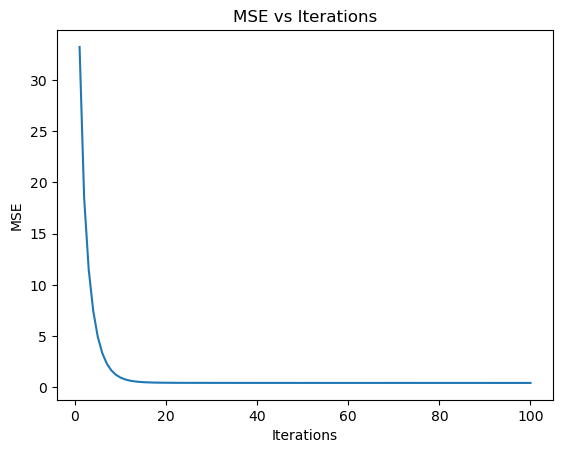

In [28]:
# Initialize parameters
coefficients = np.random.randn(X_train.shape[1])

# Gradient Descent function
def perform_gradient_descent(X, y, coefficients, learning_rate, iterations):
    sample_size = X.shape[0]
    mse_track = []
    
    for _ in range(iterations):
        predictions = np.dot(X, coefficients)
        difference = y - predictions
        gradient = -2 / sample_size * np.dot(X.T, difference)  # Derivative of MSE
        coefficients = coefficients - learning_rate * gradient
        mse = np.mean(difference ** 2)
        mse_track.append(mse)
    return coefficients, mse_track

# Perform model training using gradient descent
learning_rate = 0.1
iterations = 100
coefficients, mse_track = perform_gradient_descent(X_train, y_train, coefficients, learning_rate, iterations)

# Plot the MSE history
plt.plot(range(1, iterations + 1), mse_track)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE vs Iterations')
plt.show()

## Model Evaluation
Following the gradient descent optimization, I evaluated the model's performance on the test set. Using the optimized coefficients, I computed the predicted values and assessed the accuracy with the Mean Squared Error (MSE). Additionally, I calculated the R-squared (R²) score to quantify the goodness of fit.

In [29]:
# Make predictions on the test set using the trained coefficients
predicted_values = np.dot(X_test, coefficients)

# Calculate the Mean Squared Error on the test set
mean_squared_error = np.mean((y_test - predicted_values) ** 2)
print("Mean Squared Error:", mean_squared_error)

# Calculate the R2 score on the test set
r2_score = 1 - np.sum((y_test - predicted_values) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
print("R2 score:", r2_score)

# Output the trained model parameters
print("Model parameters are", coefficients)
    

Mean Squared Error: 0.39088063061704237
R2 score: 0.4018712686204944
Model parameters are [ 5.62392494e+00 -9.77776070e-04 -1.82648173e-01 -2.80219121e-02
 -4.44622348e-03 -9.04125008e-02  6.01724107e-02 -1.22197283e-01
  2.08262083e-02 -8.40777569e-02  1.40657844e-01  3.20301595e-01]


## Conclusion
In conclusion, the gradient descent approach successfully minimized the Mean Squared Error, indicating a satisfactory level of prediction accuracy. The R-squared value suggests that the model explains a good proportion of the variance in the data. The final coefficients provide insight into how each predictor influences the response variable. Overall, the model shows promise for predictive analysis, although there may be potential for further optimization.